In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
diabets = datasets.load_diabetes()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size = 0.25, random_state =0)

In [ ]:
X = diabets.data
Y = diabets.target

In [ ]:
model = KNeighborsRegressor(n_neighbors=10)

In [ ]:
from sklearn.model_selection import cross_val_score # (cross validation: 교차검증) - 이론 수업 때, K-Fold cross validation 배움 / cv = k값

In [ ]:
cross_val_score(model, X, Y, cv = 5, scoring = 'mean_squared_error') # 이렇게 하면 오류남...!!! # cv = k값

In [ ]:
X.shape

In [ ]:
cross_val_score(model, X, Y, cv = 20, scoring = 'neg_mean_squared_error') #마이너스일 경우, 커질수록 오차가 작아지는 것이다. -> 오류가 작다는 뜻 -> 좋은 모델 # cv = k값

In [ ]:
cv 값을 키울수록 테스트 사이즈가 작아진다.(=트레인 사이즈가 커진다.)
cv 값을 낮출수록 테스트 사이즈가 커진다.(=트레인 사이즈가 작아진다.)

In [ ]:
# 오전 수업 여기까지 함

---

In [ ]:
# 오후 수업

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()

In [ ]:
model = KNeighborsClassifier()

In [ ]:
cross_val_score(model, iris.data, iris.target, cv = 5)

In [88]:
cross_val_score(model, iris.data, iris.target, cv = 5, scoring = 'f1_macro') # ?????????? 물어보기

NameError: name 'cross_val_score' is not defined

In [ ]:
# K-fold Cross Validataion

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = np.array([['N', 'Y'],['Y', 'Y'],['N', 'Y'],['Y', 'Y'],['Y', 'Y'],['Y', 'Y']])

In [ ]:
Y = np.array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog'])

In [ ]:
kf = KFold(2)

In [ ]:
list(kf.split(X))

In [ ]:
for train_index, test_index in kf.split(X) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Train", train_index)
    print(x_train, '/', y_train)
    print("Test", test_index)
    print(x_test, '/', y_test)
    print('--------------------------------------')

In [ ]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold(층화) / # 라벨링을 한쪽에 몰아주는 것을 방지해줄때 사용
                                                                             #한쪽에 데이터가 몰리는 것을 방지해주는 것

In [ ]:
skf = StratifiedKFold(2)

In [ ]:
for train_index, test_index in skf.split(X, Y) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Train", train_index)
    print(x_train, '/', y_train)
    print("Test", test_index)
    print(x_test, '/', y_test)
    print('--------------------------------------')

---

In [ ]:
# Regression의 evaluation

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
lr = LinearRegression()

In [ ]:
diabets = datasets.load_diabetes()

In [ ]:
for _ in range(10) :
    print(_)

In [ ]:
scores = []
for i in range(10) :
    x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size = 0.25, random_state = i)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    scores.append(score)
    print(score)

In [ ]:
scores

In [ ]:
df = pd.DataFrame({'RMSE' : np.sqrt(scores)})

In [ ]:
df

In [ ]:
df.T

In [ ]:
import seaborn as sns

In [ ]:
swarm = sns.swarmplot(y = 'RMSE', data = df) # 분산(퍼짐현상)과 편향 개념을 알면 좋다

In [ ]:
학습(편향) => 명중 (비례관계)
모이는정도의 유무 또는 퍼짐 정도의 유무(분산) => 영점 (비례관계)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler를 해줘도 유의미한 결과가 없음

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(diabets.data)

In [ ]:
scores = []
for i in range(10) :
    x_train, x_test, y_train, y_test = train_test_split(X, diabets.target, test_size = 0.25, random_state = i)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    scores.append(score)
    print(score)

In [ ]:
df2 = pd.DataFrame({'RMSE' : np.sqrt(scores)})

In [ ]:
swarm = sns.swarmplot(y = 'RMSE', data = df2) # 분산(퍼짐현상)과 편향 개념을 알면 좋다

---

In [ ]:
# 평균을 구해보자

In [ ]:
df[].mean()

In [ ]:
df.T

In [ ]:
scores = []
for _ in range(10) :
    x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size = 0.25)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    scores.append(score)
    print(score)

In [ ]:
def tts_fit_score(model, X, Y, evaluation, test_size = 0.25):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    score = evaluation(y_test, preds)
    return score

In [ ]:
lr = LinearRegression()
diabets = datasets.load_diabetes()

In [ ]:
scores = [tts_fit_score(lr, diabets.data, diabets.target, mean_squared_error) for _ in range(10)]

In [ ]:
np.mean(np.sqrt(scores))

---

In [ ]:
# 

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
# train:test(7:3)이든 뭐든 원하는 비율로 조절 가능(ex)test_size나 n_splits를 이용해서 비율 조절 가능), 임의로 데이터를 잘 섞어줄 수 있음
ss = ShuffleSplit(test_size = 0.25, n_splits = 20)#, random_state = 0) 

In [ ]:
lr = LinearRegression()
diabets = datasets.load_diabetes()

In [ ]:
# train:test(9:1) 10/1 비율  , 해당하는 구간과 구간사이로 나뉘어 주기 때문에 임의로 데이터가 섞이지 않음
scores = cross_val_score(lr, diabets.data, diabets.target, cv = 20, scoring = "neg_mean_squared_error") 

In [ ]:
scores

In [ ]:
df3 = pd.DataFrame({'RMSE' : np.sqrt(-scores)})

In [ ]:
df3

In [ ]:
df3.T

In [ ]:
swarm = sns.swarmplot(y = 'RMSE', data = df3)

---

In [ ]:
# vaildation 차수 높이기

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [9]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y= (10 - 1 / (X.ravel() + 0.1)) + np.random.randn(40)

np.random.seed(1)
x = np.random.rand(40,1)**2
y = (10-1/(x.ravel()+ 0.1)) + np.random.randn(40)

In [10]:
import matplotlib.pyplot as plt

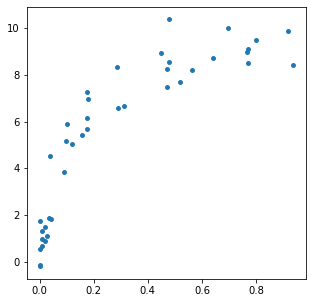

In [11]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
ax.scatter(X.ravel(), y, s=15);

In [22]:
X_test = np.linspace(-0.1, 1.1, 500) #

In [23]:
X_test # 1차원

array([-1.00000000e-01, -9.75951904e-02, -9.51903808e-02, -9.27855711e-02,
       -9.03807615e-02, -8.79759519e-02, -8.55711423e-02, -8.31663327e-02,
       -8.07615230e-02, -7.83567134e-02, -7.59519038e-02, -7.35470942e-02,
       -7.11422846e-02, -6.87374749e-02, -6.63326653e-02, -6.39278557e-02,
       -6.15230461e-02, -5.91182365e-02, -5.67134269e-02, -5.43086172e-02,
       -5.19038076e-02, -4.94989980e-02, -4.70941884e-02, -4.46893788e-02,
       -4.22845691e-02, -3.98797595e-02, -3.74749499e-02, -3.50701403e-02,
       -3.26653307e-02, -3.02605210e-02, -2.78557114e-02, -2.54509018e-02,
       -2.30460922e-02, -2.06412826e-02, -1.82364729e-02, -1.58316633e-02,
       -1.34268537e-02, -1.10220441e-02, -8.61723447e-03, -6.21242485e-03,
       -3.80761523e-03, -1.40280561e-03,  1.00200401e-03,  3.40681363e-03,
        5.81162325e-03,  8.21643287e-03,  1.06212425e-02,  1.30260521e-02,
        1.54308617e-02,  1.78356713e-02,  2.02404810e-02,  2.26452906e-02,
        2.50501002e-02,  

In [24]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1) # -1 -> 전체를 의미

In [25]:
X_test # 2차원

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

In [46]:
poly = PolynomialFeatures(2) # -> 2차원으로 늘려줌 

In [47]:
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_poly, y)

LinearRegression()

In [50]:
y_test = lr.predict(X_test_poly)

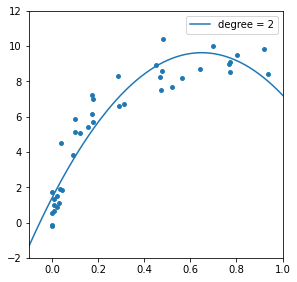

In [55]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(2, 2, 2)
ax.scatter(X.ravel(), y, s = 15)
ax.plot(X_test.ravel(), y_test, label = 'degree = 2')
ax.set_xlim(-0.1, 1.0)
ax.set_ylim(-2, 12)
ax.legend(loc = 'best')#;

In [ ]:
# 2차원

In [28]:
X[0]

array([0.17390735])

In [29]:
X_poly[0] # 결과값(2차원): 1, X, X^2 

array([1.        , 0.17390735, 0.03024377])

In [ ]:
# 3차원

In [30]:
poly3 = PolynomialFeatures(3) # -> 3차원으로 늘려줌 

In [31]:
X_poly3 = poly3.fit_transform(X)

In [32]:
X[0]

array([0.17390735])

In [33]:
X_poly3[0] # 결과값(3차원): 1, X, X^2, X^3

array([1.        , 0.17390735, 0.03024377, 0.00525961])

---

In [ ]:
# PipeLine

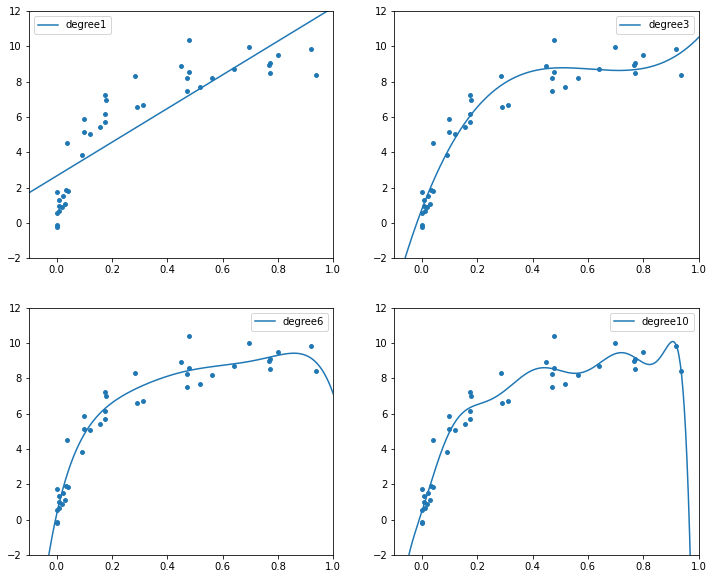

In [59]:
fig = plt.figure(figsize = (12,10))
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)
for i, degree in enumerate([1, 3, 6, 10], start = 1) :
    
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y).predict(X_test)
    
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s = 15)
    ax.plot(X_test.ravel(), y_test, label = 'degree' + str(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc = 'best')#;

In [ ]:
1차원: 예측이 잘 안됨
3차원: 2번 꺾임 
6차원: 6번 꺾임
10차원: 10번 꺾임

차원(degree)가 높아질수록 학습을 잘 하지만, 트레인 부분과 유사해서 학습을 잘하기 때문에 오퍼피팅이 일어날 확률도 높아진다.

In [ ]:
# learning curve를 그려볼 것이다.

In [60]:
from sklearn.model_selection import validation_curve

In [65]:
degree = np.arange(0, 21)

In [66]:
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [67]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [68]:
# 데이터를 7등분해라 (=cv=7)
train_score, test_score = validation_curve(model, X, y, param_name = 'polynomialfeatures__degree', param_range = degree, cv = 7)

In [69]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

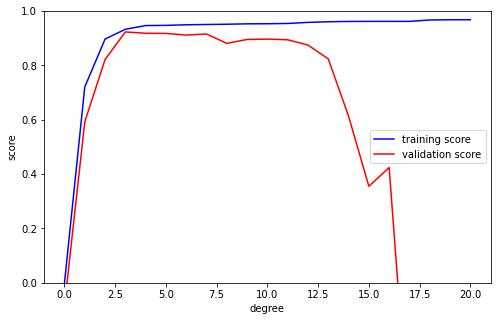

In [73]:
plt.figure(figsize = (8, 5))
plt.plot(degree, np.median(train_score, 1), "b-", label = 'training score') # train
plt.plot(degree, np.median(test_score, 1), "r-", label = 'validation score') # test = validation
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc = 'best')#;

In [ ]:
# 해석:(degree라는 인자를 변경하면서 트레인과 테스트를 비교해봄)
degree 3인 지점이 best인 지점인 것을 확인할 수 있음
degree가 12.5인 지점부터 train 스코어와 test스코어의 갭이 벌어지기 시작 -> 이후 오버피팅이 일어나는 것을 확인할 수 있음

---

In [ ]:
# pipeline과 learnning curve가 있으니 무시하고....?

In [78]:
from sklearn.model_selection import learning_curve # 트레인이랑 테스트 비율을 확인할 때 사용함.

In [79]:
np.linspace(0.1, 1, 25)

array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])

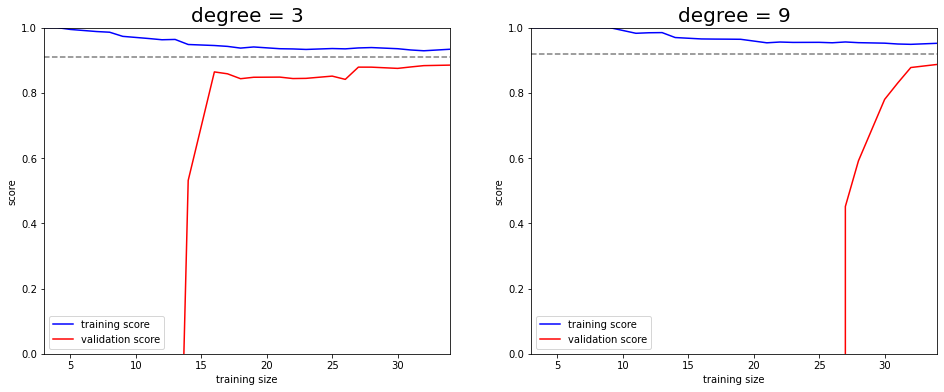

In [87]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
for i, degree in enumerate([3, 9]) :
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    n, train_lc, test_lc = learning_curve(model, X, y, cv = 7, train_sizes = np.linspace(0.1, 1, 25))
    
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label = 'training score') # train
    ax[i].plot(n, np.mean(test_lc, 1), "r-", label = 'validation score') # test = validation
    ax[i].hlines(np.mean([train_lc[-1], test_lc[-1]]), n[0], n[-1], color = 'gray', linestyle = 'dashed')
    ax[i].set(xlim =(n[0], n[-1]), ylim = (0, 1), xlabel = 'training size', ylabel = 'score')
    ax[i].set_title('degree = {}'.format(degree), size = 20)
    ax[i].legend(loc = 'best')#;

In [ ]:
# 해석:
degree가 높아질 수록 트레인 사이즈가 충분히 많아야한다.
degree가 높을 수록 오버피팅 될 확률이 높음.

트레인, 테스트 비율을 보통 7:3, 8:2, 9:1 이렇게 3가지 종류로 비율을 나눠서 사용한다.

In [ ]:
파라미터를 바꾸는 행위를 튜닝이라고 한다. -> 내일 튜닝 작업 부분에 대해 할 것이다.